# Relevant imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from string import digits
import pandas_profiling
import itertools
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# Ignore some warnings 
import warnings
warnings.filterwarnings('ignore')

# Enable display of all columns
pd.options.display.max_columns = None

from sklearn.preprocessing   import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.dummy           import DummyClassifier
from sklearn.linear_model    import LogisticRegression
from sklearn.svm             import SVC
from sklearn.neighbors       import KNeighborsClassifier
from sklearn.tree            import DecisionTreeClassifier
from sklearn.ensemble        import RandomForestClassifier
from sklearn.ensemble        import GradientBoostingClassifier
from sklearn.linear_model    import LinearRegression, Lasso, Ridge, ElasticNet

from sklearn.pipeline        import Pipeline
from sklearn.metrics         import confusion_matrix
from sklearn.metrics         import roc_auc_score
from sklearn.metrics         import roc_curve
from sklearn.metrics         import mean_squared_error
from sklearn.metrics         import f1_score, fbeta_score

from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

from sklearn.preprocessing   import OneHotEncoder


SEED = 1

# Load the data


In [2]:
#We load the data set into a pandas dataframe
data_to_learn = pd.read_excel('IPO_data_to_learn.xlsx')
data_to_predict = pd.read_excel('IPO_data_to_predict.xlsx')

# Data cleaning

We clean the data to learn from, and we apply the same cleaning to the data to predict

In [3]:
print(data_to_learn.shape)
data_to_learn.head(3)

(3330, 47)


,Unnamed: 0,closeDay1,offerPrice,rf,egc,html,patRatio,city,issuer,highTech,age,exchange,year,industryFF5,industryFF12,industryFF48,nUnderwriters,sharesOfferedPerc,totalProceeds,manager,investmentReceived,amountOnProspectus,commonEquity,sp2weeksBefore,nasdaq2weeksBefore,dj2weeksBefore,blueSky,managementFee,commonEquity.1,bookValue,totalAssets,totalRevenue,netIncome,roa,leverage,vc,pe,prominence,nVCs,nExecutives,priorFinancing,ipoSize,reputationLeadMax,reputationLeadAvg,reputationSum,reputationAvg,nPatents
0,974,35.5625,14.0,RISK FACTORS You should carefully consider the...,False,False,0.492063,SAN JOSE,Numerical Technologies Inc,True,5.0,NASDQ,2000,"Business Equipment, Telephone and Television T...","Business Equipment -- Computers, Software, and...",Electronic Equipment,14,30.50,68114956,Credit Suisse First Boston Corp,64190.0,77.5,NaN,1527.45,4963.03,11112.72,8000.0,924417.0,100.00,219.134116,240.974,23.340,-48.811,-0.202557,0.000000,True,False,1,5.0,5.0,64190.0,68114956.0,9.001,9.001,106.014,7.572429,1
1,2585,20.0000,18.0,risk factors an investment in our common stock...,False,True,NaN,CONWAY,"Home BancShares Inc,Conway,AR",False,8.0,NASDQ,2006,Other,Finance,Banking,4,17.09,45000000,Stephens Inc,NaN,45.0,0.063,1257.93,2145.32,10938.82,NaN,NaN,40.99,231.418979,2190.648,142.890,15.918,0.007266,0.155445,False,False,0,NaN,NaN,NaN,NaN,7.001,7.001,19.003,4.750750,0
2,1936,26.1500,21.0,risk factors investing in our common stock inv...,False,True,NaN,BOISE,Boise Cascade Co,False,9.0,NYSE,2013,Other,Other,Construction Materials,8,27.21,247058826,Bank of America Merrill Lynch\nGoldman Sachs &...,615284.0,247.1,0.094,1492.56,3143.18,13712.21,NaN,3750588.0,64.26,452.480993,1104.186,3273.496,116.936,0.105902,0.273154,False,True,0,3.0,15.0,615284.0,247058826.0,9.001,8.751,29.004,3.625500,77


In [4]:
data_to_learn.columns

Index(['Unnamed: 0', 'closeDay1', 'offerPrice', 'rf', 'egc', 'html',
       'patRatio', 'city', 'issuer', 'highTech', 'age', 'exchange', 'year',
       'industryFF5', 'industryFF12', 'industryFF48', 'nUnderwriters',
       'sharesOfferedPerc', 'totalProceeds', 'manager', 'investmentReceived',
       'amountOnProspectus', 'commonEquity', 'sp2weeksBefore',
       'nasdaq2weeksBefore', 'dj2weeksBefore', 'blueSky', 'managementFee',
       'commonEquity.1', 'bookValue', 'totalAssets', 'totalRevenue',
       'netIncome', 'roa', 'leverage', 'vc', 'pe', 'prominence', 'nVCs',
       'nExecutives', 'priorFinancing', 'ipoSize', 'reputationLeadMax',
       'reputationLeadAvg', 'reputationSum', 'reputationAvg', 'nPatents'],
      dtype='object')

**Below we see that the Unnamed_0 column represent some kind of indexing on the data which we don't need, hence it makes sence to drop that column.**

In [5]:
data_to_learn["Unnamed: 0"].unique().shape

(3330,)

In [6]:
data_to_learn.drop("Unnamed: 0", axis=1, inplace=True)
data_to_predict.drop("Unnamed: 0", axis=1, inplace=True)

**We decided to use pandas_profiling to output a full report of our dataset, we will then proceed to data cleaning accordingly**

In [7]:
#data_to_learn.profile_report(style={'full_width':True})

In [8]:
#profile = data_to_learn.profile_report(title='IPO data Profiling Report')
#profile.to_file(output_file="data_profile.html")

## Correlation matrix

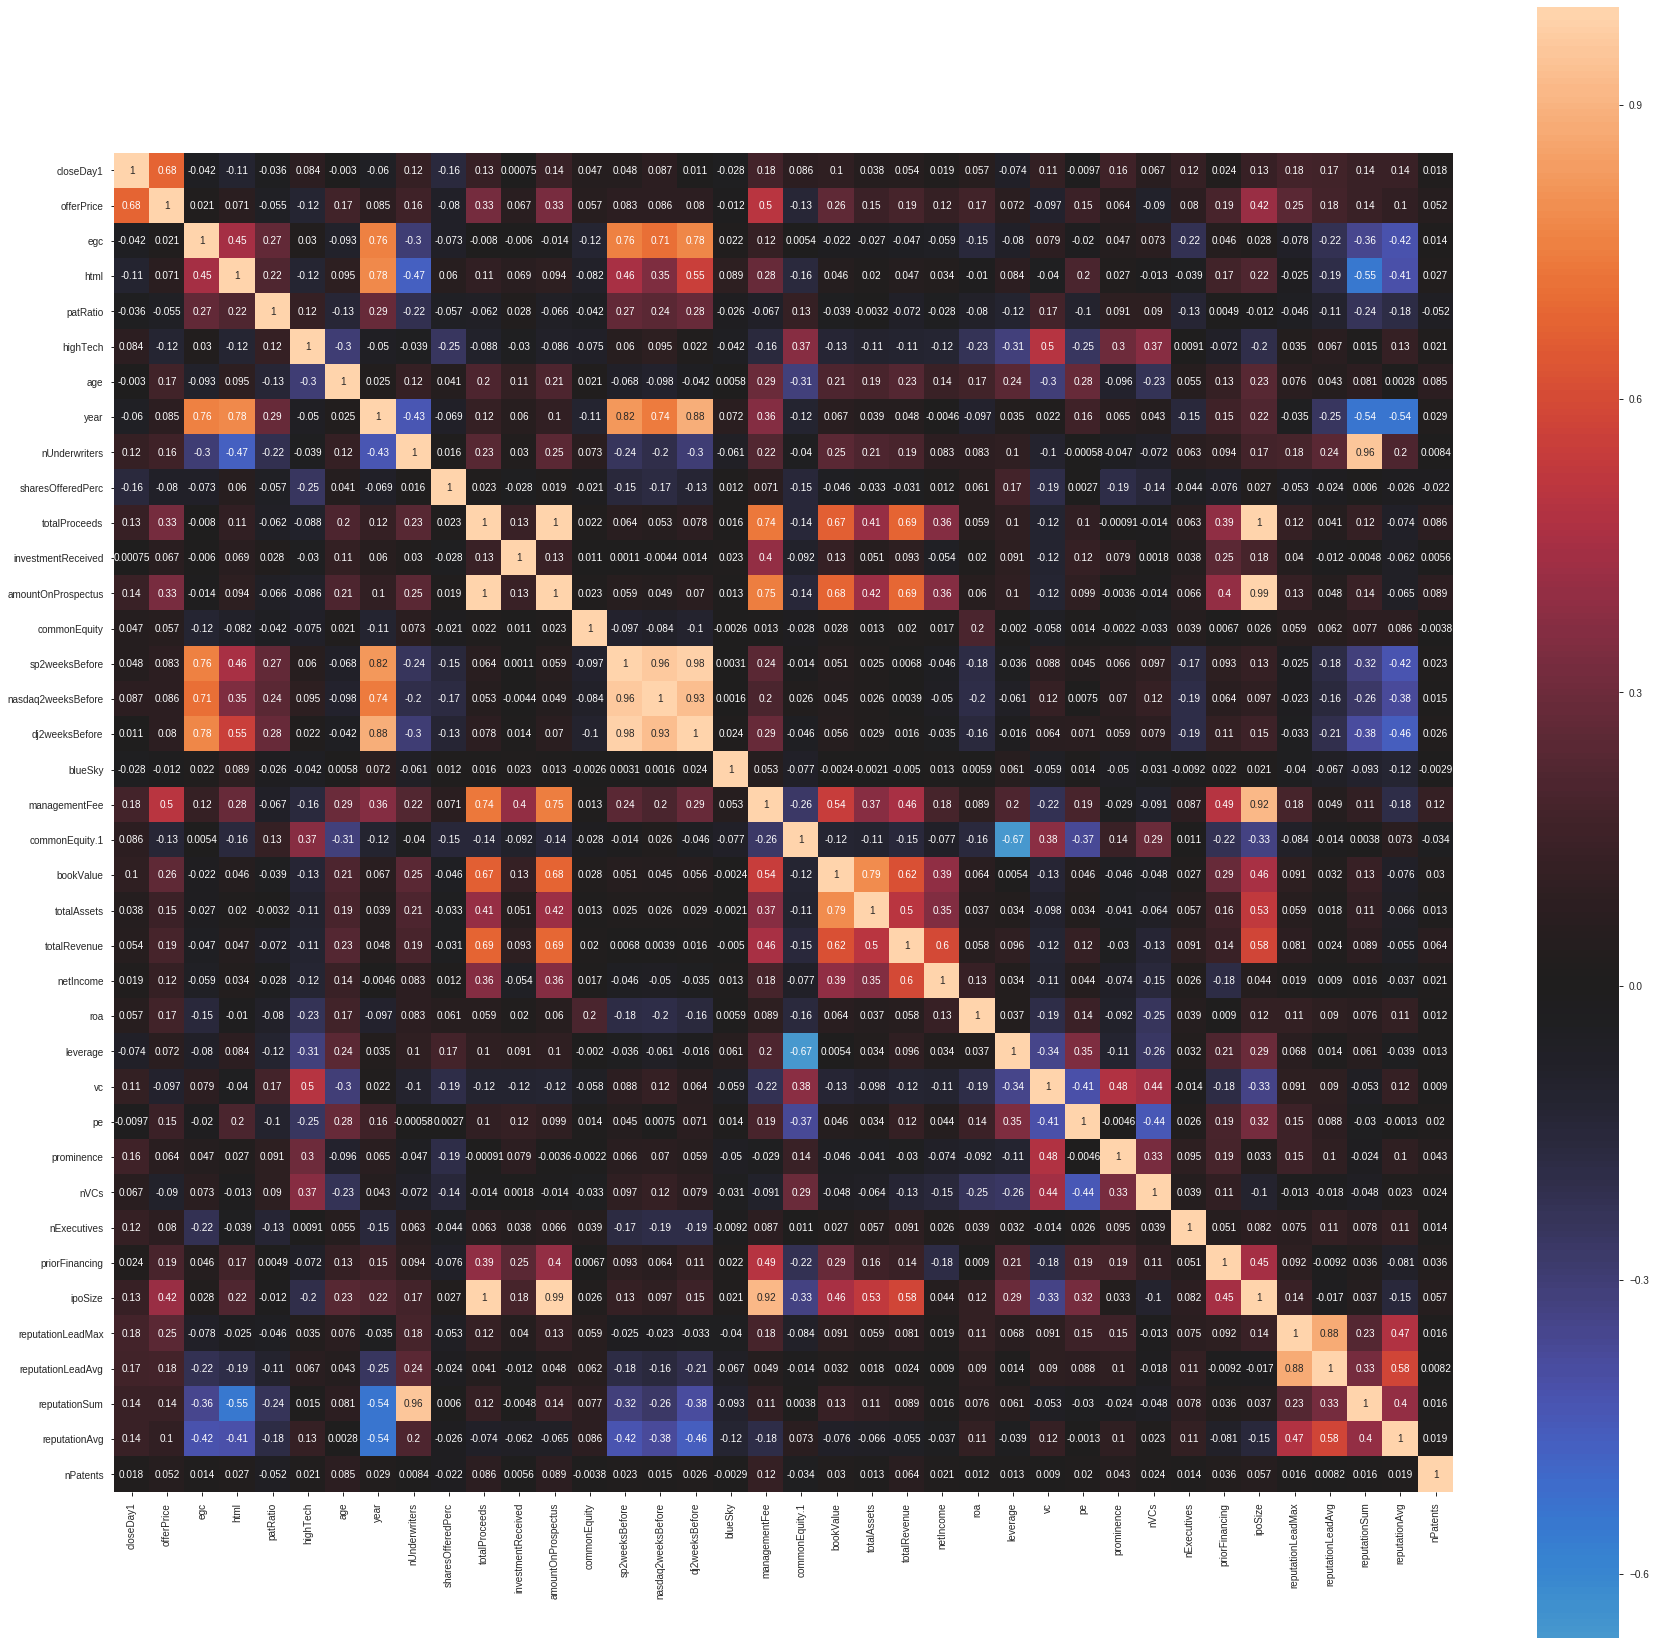

In [9]:
df = data_to_learn.corr()

plt.figure(figsize=(30,30))
sns.heatmap(data=df, xticklabels=df.columns, square=True, annot=True, center=0)

## I. Dropping highly correlated rows

We see from the correlation matrix the following interesting correlations:
- `ipoSize` and `totalProceeds` : 1.0
- `amountOnProspectus` and `totalProceeds`: 1.0
- `reputationSum` and `nUnderwriters`: 0.96

We choose to drop `ipoSize`, `amountOnProspectus` and `reputationSum`.

In [10]:
# We could also drop managementFee, nasdaq2weeksBefore, sp2weeksBefore, totalProceeds -> TEST later
data_to_learn.drop(["ipoSize", "amountOnProspectus", 'reputationSum'], axis=1, inplace=True)
data_to_predict.drop(["ipoSize", "amountOnProspectus", 'reputationSum'], axis=1, inplace=True)

## II. Dealing with missing values
We deal with missing values differently depending on the nature/distribution of the variables

**Drop** the NaN:
- `City`
- `CloseDay1`

Replace NaN by **empty string**:
- `rf`

Replace NaN by **0**:
- `leverage`
- `blueSky`

Replace NaN by **median**:
- `age`
- `bookValue`
- `investmentReceived`
- `managementFee`
- `commonEquity`
- `commonEquity.1`
- `investmentReceived`
- `nExecutives`
- `netIncome`
- `nVCs`
- `patRatio`
- `priorFinancing`
- `roa`
- `sharesOfferedPerc`
- `totalAssets`
- `totalRevenue`


In [11]:
#For feature city we dropped the only record which had NaN because it also had NaN in other columns
data_to_learn.dropna(subset=['city'], inplace = True)

In [12]:
data_to_learn.city.value_counts()

NEW YORK                          195
HOUSTON                            98
SAN DIEGO                          87
CAMBRIDGE                          78
SAN FRANCISCO                      71
                                 ... 
CENTENNIAL                          1
TECHNOLOGY DEVELOPING DISTRICT      1
WOODLAND                            1
GARFIELD HEIGHTS                    1
HAMILTON BERMUDA HM 11              1
Name: city, Length: 947, dtype: int64

In [13]:
# In the data_to_predict, we replace the city by the most common city
data_to_predict['city'].fillna(value='NEW YORK', inplace=True)

In [16]:
# It made sence to give the value 0 to the missing values in leverage as it's the most common value 
#[https://www.thebalancesmb.com/how-leverage-can-benefit-your-business-398312]
data_to_learn['leverage'].fillna(value=0, inplace=True)
data_to_predict['leverage'].fillna(value=0, inplace=True)

In [17]:
#For feature blueSky, we replaced missing values by the value zero, 
#because in some states of the US there are no Blue Sky expenses.
#[https://www.colonialstock.com/blue-sky-state-filing-fees.htm]
data_to_learn['blueSky'].fillna(value=0, inplace=True)
data_to_predict['blueSky'].fillna(value=0, inplace=True)

In [18]:
#For features age, bookValue, investmentReceived, managementFee we used the median
values = {'age': data_to_learn["age"].median(),\
          'bookValue': data_to_learn["bookValue"].median(),\
          'investmentReceived': data_to_learn["investmentReceived"].median(),\
          'managementFee': data_to_learn["managementFee"].median(),\
          'commonEquity': data_to_learn["commonEquity"].median(),\
          'commonEquity.1': data_to_learn["commonEquity.1"].median(),\
          'investmentReceived': data_to_learn["investmentReceived"].median(),\
          'nExecutives': data_to_learn["nExecutives"].median(),\
          'netIncome': data_to_learn["netIncome"].median(),\
          'nVCs': data_to_learn["nVCs"].median(),\
          'patRatio': data_to_learn["patRatio"].median(),\
          'priorFinancing': data_to_learn["priorFinancing"].median(),\
          'roa': data_to_learn["roa"].median(),\
          'sharesOfferedPerc': data_to_learn["sharesOfferedPerc"].median(),\
          'totalAssets': data_to_learn["totalAssets"].median(),\
          'totalRevenue': data_to_learn["totalRevenue"].median()
         }

data_to_learn.fillna(value=values, inplace=True)
data_to_predict.fillna(value=values, inplace=True)

In [19]:
## closeDay1 is what we want to predict
## We drop the NaN values since it is akin to non-label data and they only represent 3% of the data

print("closeDay1 == NaN: ", data_to_learn.closeDay1.isna().sum())
print("closeDay1 == NaN: ", data_to_learn.closeDay1.isna().sum()/data_to_learn.closeDay1.shape[0]*100, '%')

data_to_learn = data_to_learn.dropna(subset=['closeDay1'])

closeDay1 == NaN:  115
closeDay1 == NaN:  3.4544908380895163 %


In [20]:
# replace NaN rf by empty string 

data_to_learn.fillna('', inplace=True)
data_to_predict.fillna('', inplace=True)

## III. Data Preprocessing

First let's give our columns more meaningful names

In [21]:
data_to_learn.rename(columns={
    "commonEquity": "commonEquityPercentage",\
    "commonEquity.1": "commonEquity"
}, inplace=True)

data_to_predict.rename(columns={
    "commonEquity": "commonEquityPercentage",\
    "commonEquity.1": "commonEquity"
}, inplace=True)

### patRatio

We get rid of infinite values and set them to 0 since they correspond to (occurences of "patent" in the rf)/(length of rf)


In [22]:
data_to_learn.patRatio[data_to_learn.patRatio == np.inf].count()

data_to_learn.patRatio.replace(np.inf, 0.0, inplace=True)
data_to_predict.patRatio.replace(np.inf, 0.0, inplace=True)

### City
We clean the City feature: we remove numbers to avoid duplicates and leading and trailing whitespaces

In [23]:
# We remove numbers to avoid duplicates and leading and trailing whitespaces
data_to_learn["city"] = data_to_learn["city"].str.replace('\d+', '').str.strip()
data_to_predict["city"] = data_to_predict["city"].str.replace('\d+', '').str.strip()

In [24]:
#We can try to hot encode the city as well and see if it gives better predictions -> it will add 913 cols
print("Number of possible cities in our dataset", len(data_to_learn["city"].unique()))
#data_to_learn = pd.get_dummies(data=data_to_learn, columns=['city'])
#data_to_predict = pd.get_dummies(data=data_to_predict, columns=['city'])

Number of possible cities in our dataset 913


In [25]:
# For now, we discard the city. Later, hot-encode or something
data_to_learn.drop(['city'], axis=1, inplace=True)
data_to_predict.drop(['city'], axis=1, inplace=True)

### industryFF5, industryFF12, industryFF48

They are industry classifications with respectivelly 5, 12 and 48 categories.

We will label encode them 

In [26]:
data_to_learn.industryFF5.value_counts().shape

(5,)

In [27]:
data_to_learn.industryFF12.value_counts().shape

(12,)

In [28]:
data_to_learn.industryFF48.value_counts().shape

(48,)

In [29]:
# Hot-encode
data_to_learn = pd.get_dummies(data=data_to_learn, columns=['industryFF5', 'industryFF12', 'industryFF48'])
data_to_predict = pd.get_dummies(data=data_to_predict, columns=['industryFF5', 'industryFF12', 'industryFF48'])

In [30]:
print("Missing columns in data_to_predict set: ", set(data_to_learn.columns) - set(data_to_predict.columns))

Missing columns in data_to_predict set:  {'industryFF48_Construction Materials', 'closeDay1', 'industryFF48_Defense', 'industryFF48_Other', 'industryFF48_Printing and Publishing', 'industryFF48_Business Supplies', 'industryFF48_Agriculture', 'industryFF48_Rubber and Plastic Products', 'industryFF48_Textiles'}


* (closeDay1 - offerPrice) is the value we are trying to predict, that's why closeDay1 column is missing from the test set.
* We should add the missing columns except closeDay1 to the test set to be able to apply our models on the test set later on. We will attribute the value 0 to those missing features.

In [31]:
missing_cols = ['industryFF48_Other', 'industryFF48_Construction Materials', 'industryFF48_Agriculture', \
                'industryFF48_Printing and Publishing', 'industryFF48_Defense', \
                'industryFF48_Rubber and Plastic Products', 'industryFF48_Business Supplies', \
                'industryFF48_Textiles']
for col in missing_cols:
    data_to_predict[col]=0

In [32]:
#Sanity check
print("Missing columns in data_to_predict set: ", set(data_to_learn.columns) - set(data_to_predict.columns))

Missing columns in data_to_predict set:  {'closeDay1'}


In [33]:
print("Missing columns in data_to_learn set: ", sorted(list(set(data_to_predict.columns) - set(data_to_learn.columns))))

Missing columns in data_to_learn set:  ['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9']


### Exchange

The exchange is either `NASDQ`, `NYSE` or `ÀMEX`. 

We hot-encode it

In [34]:
data_to_learn.exchange.value_counts()

NASDQ    2288
NYSE      871
AMEX       55
Name: exchange, dtype: int64

In [35]:
# Hot-encode
data_to_learn = pd.get_dummies(data=data_to_learn, columns=['exchange'])
data_to_predict = pd.get_dummies(data=data_to_predict, columns=['exchange'])

### Issuer

`issuer` is unique. We assume it therefore gives no predictive value and we drop it.

In [36]:
data_to_learn.issuer.is_unique

True

In [37]:
data_to_learn.drop(["issuer"], axis=1, inplace=True)
data_to_predict.drop(["issuer"], axis=1, inplace=True)

### egc, html, highTech, vc, pe

`egc, html, highTech, vc, pe` are boolean variables, we convert them to Numerical, where True=1, False=0)

In [38]:
bool_cols=["egc", "html", "highTech", "vc", "pe"]
for col in bool_cols:
    data_to_learn[col]=data_to_learn[col].map(lambda s :1  if s else 0)
    data_to_predict[col]=data_to_predict[col].map(lambda s :1  if s else 0)

## III. Feature engineering

### Process `manager`

#### Preprocessing

- Separate the managers (The managers are separated by `\n`)

#### Feature engineering

- Store the amount of managers as `managerLength` (it might be useful)
- Compute the average of the success rates of each manager and store it as `managerSuccessAvg`


In [39]:
data_to_learn.manager.head()


0                      Credit Suisse First Boston Corp
1                                         Stephens Inc
2    Bank of America Merrill Lynch\nGoldman Sachs &...
3                                 CS First Boston Corp
4    Cowen & Co\nPiper Jaffray Cos\nJMP Securities LLC
Name: manager, dtype: object

In [40]:
data_to_learn.reset_index(drop=True, inplace=True)
data_to_predict.reset_index(drop=True, inplace=True)

In [41]:
data_to_learn.manager = data_to_learn.manager.apply(lambda x: set(x.split('\n')))
data_to_predict.manager = data_to_predict.manager.apply(lambda x: set(x.split('\n')))

In [42]:
data_to_learn['managerLength'] = data_to_learn.manager.apply(lambda x: len(x))
data_to_predict['managerLength'] = data_to_predict.manager.apply(lambda x: len(x))

In [43]:
# List the index where the IPO is successful
success = data_to_learn.closeDay1 > data_to_learn.offerPrice
successful_index = success[success == True].index.to_list()

In [44]:
# Compute the average of the success rates of each manager
for i, managers in enumerate(data_to_learn.manager):
    average_success_rates = []
    for manager in managers:
        average_success_rate = success[data_to_learn.manager.apply(lambda x: manager in x)].mean()
        
        if np.isnan(average_success_rate): # If the manager has never been successful
            average_success_rate = 0
        
        average_success_rates.append(average_success_rate)
        
    data_to_learn.loc[i, 'managerSuccessAvg'] = np.array(average_success_rates).mean()
        
        
for i, managers in enumerate(data_to_predict.manager):
    average_success_rates = []
    for manager in managers:
        average_success_rate = success[data_to_learn.manager.apply(lambda x: manager in x)].mean()
        
        if np.isnan(average_success_rate): # If the manager has never been successful
            average_success_rate = 0
            
        average_success_rates.append(average_success_rate)

    data_to_predict.loc[i, 'managerSuccessAvg'] = np.array(average_success_rates).mean()

In [45]:
data_to_learn.drop('manager', axis=1, inplace=True)
data_to_predict.drop('manager', axis=1, inplace=True)

### Process `rf`

#### Preprocessing

- Clean punctuation
- Remove stopwords
- Lemmatize
- Lowercase

#### Feature engineering

- Store `rf` length, it might be useful
- Create scores relating the similarity between rf entries
    - Create a corpus where each document is a `rf` entry (1)
    - Compute the TF-IDF representation of each of those documents
    - Compute the **cosine-similarity** between **each** document's TF-IDF representation and **all** the TF-IDF representations of the **successful** IPO
    - Store the success rate of the top 1, 10 and 100 similarity rf

    When a new document appears:
    - Compute the TF-IDF of this new document (using (1) as corpus)
    - Compute the **cosine-similarity** of your new document's TF-IDF representation and **all** the TF-IDF representations of the **successful** IPO
    - Store the success rate of the top 1, 10 and 100 similarity rf


Mean rf word length:  4368.920970752956
Std rf word length:  1407.3524025322668


Text(0, 0.5, 'Occurences')

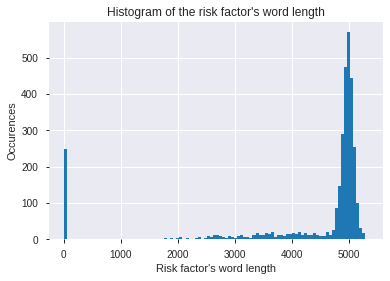

In [46]:
df = data_to_learn.rf.apply(lambda x: len(x.split()))
df.hist(bins=100)
print("Mean rf word length: ", df.mean())
print("Std rf word length: ", df.std())
plt.title("Histogram of the risk factor's word length")
plt.xlabel("Risk factor's word length")
plt.ylabel("Occurences")

In [47]:
import re 
import spacy
import nltk
from nltk import corpus

stopwords = set(corpus.stopwords.words('english'))

def clean_re(txt):
    return re.sub(r'[^\w\s]', '', txt) # We get rid of (non-words, non-whitespaces)

def remove_stopwords(txt):
    removed_txt = []
    for token in txt.split():
        if not token in stopwords:
            removed_txt.append(token)
    return ' '.join(removed_txt)

def lemmatize_text(txt):
    wnl = nltk.stem.WordNetLemmatizer() # maybe use a better lemmatizer eventually 
    
    lemmatized_txt = []
    for token in txt.split():
        lemmatized_txt.append(wnl.lemmatize(token))
    return ' '.join(lemmatized_txt).strip()

def preprocess_text(txt):
    txt = clean_re(txt)
    txt = remove_stopwords(txt.lower())
    txt = lemmatize_text(txt)
    return txt

In [48]:
data_to_learn.rf = data_to_learn.rf.apply(preprocess_text)
data_to_predict.rf = data_to_predict.rf.apply(preprocess_text)


In [49]:
data_to_learn['rfLength'] = data_to_learn.rf.apply(lambda x: len(x.split()))
data_to_predict['rfLength'] = data_to_predict.rf.apply(lambda x: len(x.split()))

In [50]:
# List the index where the IPO is successful
success = data_to_learn.closeDay1 > data_to_learn.offerPrice
successful_index = success[success == True].index.to_list()

In [51]:
# Compute the TF-IDF score of each rf entry
tf_idf_vectorizer = TfidfVectorizer(ngram_range=(1,3), min_df=0)
tf_idf_vectorizer.fit(data_to_learn.rf)
tf_idf_matrix = tf_idf_vectorizer.transform(data_to_learn.rf)

In [52]:
# Compute the **average cosine-similarity** between **each** document's TF-IDF representation and top1, top10 and top100 of the TF-IDF representations of the **successful** IPO
import time
from tqdm import tqdm
for i, _ in tqdm(enumerate(data_to_learn.rf)):
    cosine_similarities = linear_kernel(tf_idf_matrix[i], tf_idf_matrix[successful_index]).flatten()
    top_cosine_similarities_index = [j for j in cosine_similarities.argsort()[::-1] if i != j]
    data_to_learn.loc[i, 'rfSuccessAvgTop1'] = success[top_cosine_similarities_index[0:1]].mean()
    data_to_learn.loc[i, 'rfSuccessAvgTop10'] = success[top_cosine_similarities_index[0:10]].mean()
    data_to_learn.loc[i, 'rfSuccessAvgTop100'] = success[top_cosine_similarities_index[0:100]].mean()
    time.sleep(0.001)

3214it [33:33,  1.60it/s]


In [53]:
# Compute the **average cosine-similarity** between **each** document's TF-IDF representation and top1, top10 and top100 of the TF-IDF representations of the **successful** IPO
for i, _ in enumerate(data_to_predict.rf):
    cosine_similarities = linear_kernel(tf_idf_vectorizer.transform(data_to_predict.rf[i:i+1]), tf_idf_matrix[successful_index]).flatten()
    top_cosine_similarities_index = [j for j in cosine_similarities.argsort()[::-1]]
    data_to_predict.loc[i, 'rfSuccessAvgTop1'] = success[top_cosine_similarities_index[0:1]].mean()
    data_to_predict.loc[i, 'rfSuccessAvgTop10'] = success[top_cosine_similarities_index[0:10]].mean()
    data_to_predict.loc[i, 'rfSuccessAvgTop100'] = success[top_cosine_similarities_index[0:100]].mean()

In [54]:
data_to_learn.drop('rf', axis=1, inplace=True)
data_to_predict.drop('rf', axis=1, inplace=True)

In [55]:
data_to_learn.to_pickle('data_to_learn.pkl')
data_to_predict.to_pickle('data_to_predict.pkl')

# Exploratory Data Analysis

## I. View features distributions and dealing with outliers if any

In [ ]:
data_to_learn = pd.read_pickle('data_to_learn.pkl')
data_to_predict = pd.read_pickle('data_to_predict.pkl')

In [60]:
data_to_learn.dtypes[:35]

closeDay1                 float64
offerPrice                float64
egc                         int64
html                        int64
patRatio                  float64
highTech                    int64
age                       float64
year                        int64
nUnderwriters               int64
sharesOfferedPerc         float64
totalProceeds               int64
investmentReceived        float64
commonEquityPercentage    float64
sp2weeksBefore            float64
nasdaq2weeksBefore        float64
dj2weeksBefore            float64
blueSky                   float64
managementFee             float64
commonEquity              float64
bookValue                 float64
totalAssets               float64
totalRevenue              float64
netIncome                 float64
roa                       float64
leverage                  float64
vc                          int64
pe                          int64
prominence                  int64
nVCs                      float64
nExecutives   

We see from the above that our datatypes check out.

In [61]:
data_to_learn.describe()

,closeDay1,offerPrice,egc,html,patRatio,highTech,age,year,nUnderwriters,sharesOfferedPerc,totalProceeds,investmentReceived,commonEquityPercentage,sp2weeksBefore,nasdaq2weeksBefore,dj2weeksBefore,blueSky,managementFee,commonEquity,bookValue,totalAssets,totalRevenue,netIncome,roa,leverage,vc,pe,prominence,nVCs,nExecutives,priorFinancing,reputationLeadMax,reputationLeadAvg,reputationAvg,nPatents,"industryFF5_Business Equipment, Telephone and Television Transmission","industryFF5_Consumer Durables, NonDurables, Wholesale, Retail, and Some Services (Laundries, Repair Shops)","industryFF5_Healthcare, Medical Equipment, and Drugs","industryFF5_Manufacturing, Energy, and Utilities",industryFF5_Other,"industryFF12_Business Equipment -- Computers, Software, and Electronic Equipment",industryFF12_Chemicals and Allied Products,"industryFF12_Consumer Durables -- Cars, TV's, Furniture, Household Appliances","industryFF12_Consumer NonDurables -- Food, Tobacco, Textiles, Apparel, Leather, Toys",industryFF12_Finance,"industryFF12_Healthcare, Medical Equipment, and Drugs","industryFF12_Manufacturing -- Machinery, Trucks, Planes, Off Furn, Paper, Com Printing","industryFF12_Oil, Gas, and Coal Extraction and Products",industryFF12_Other,industryFF12_Telephone and Television Transmission,industryFF12_Utilities,"industryFF12_Wholesale, Retail, and Some Services (Laundries, Repair Shops)",industryFF48_Agriculture,industryFF48_Aircraft,industryFF48_Almost Nothing,industryFF48_Apparel,industryFF48_Automobiles and Trucks,industryFF48_Banking,industryFF48_Beer & Liquor,industryFF48_Business Services,industryFF48_Business Supplies,industryFF48_Candy & Soda,industryFF48_Chemicals,industryFF48_Coal,industryFF48_Communication,industryFF48_Computers,industryFF48_Construction,industryFF48_Construction Materials,industryFF48_Consumer Goods,industryFF48_Defense,industryFF48_Electrical Equipment,industryFF48_Electronic Equipment,industryFF48_Entertainment,industryFF48_Fabricated Products,industryFF48_Food Products,industryFF48_Healthcare,industryFF48_Insurance,industryFF48_Machinery,industryFF48_Measuring and Control Equipment,industryFF48_Medical Equipment,industryFF48_Non-Metallic and Industrial Metal Mining,industryFF48_Other,industryFF48_Personal Services,industryFF48_Petroleum and Natural Gas,industryFF48_Pharmaceutical Products,industryFF48_Printing and Publishing,industryFF48_Real Estate,industryFF48_Recreation,"industryFF48_Restaraunts, Hotels, Motels",industryFF48_Retail,industryFF48_Rubber and Plastic Products,"industryFF48_Shipbuilding, Railroad Equipment",industryFF48_Shipping Containers,industryFF48_Steel Works Etc,industryFF48_Textiles,industryFF48_Tobacco Products,industryFF48_Trading,industryFF48_Transportation,industryFF48_Utilities,industryFF48_Wholesale,exchange_AMEX,exchange_NASDQ,exchange_NYSE,managerLength,managerSuccessAvg,rfLength,rfSuccessAvgTop1,rfSuccessAvgTop10,rfSuccessAvgTop100
count,3214.000000,3214.000000,3214.00000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3.214000e+03,3.214000e+03,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3.214000e+03,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.00000,3214.000000,3214.000000,3.214000e+03,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000

It looks like we don't have outliers. We will furthermore look at the features distributions next as a sanity check.

## Feature augmentation

* For the heavy tailed distributions, we apply a log function and add the log scaled feature to our data set.
* We can also try other types of augmentation such as polynomial augmentation and feature multiplications later on.

In [62]:
cols_to_plot = ["closeDay1", "offerPrice", "patRatio", "age", "nUnderwriters", "sharesOfferedPerc",\
"totalProceeds", "investmentReceived", "commonEquityPercentage", "bookValue",\
"totalAssets", "totalRevenue", "netIncome", "roa", "leverage", "prominence",\
"nVCs", "nExecutives", "priorFinancing", "reputationLeadMax", "reputationLeadAvg",\
"reputationAvg", "nPatents"]

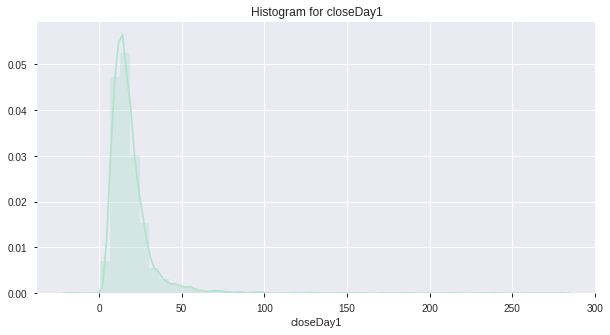

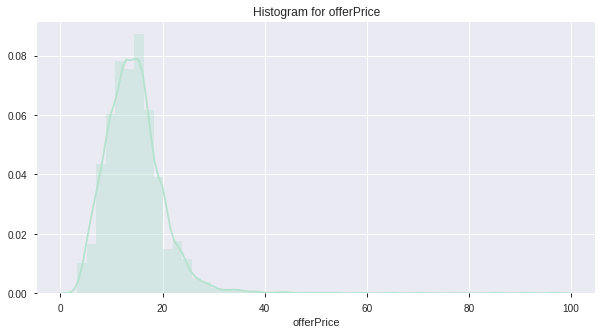

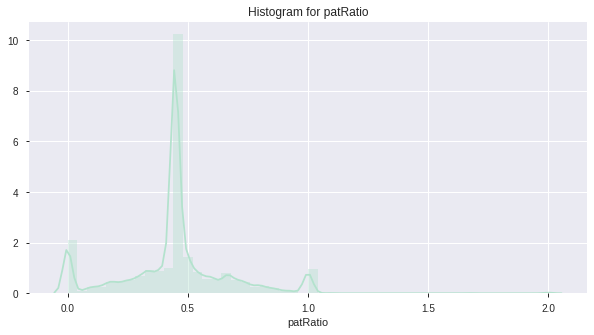

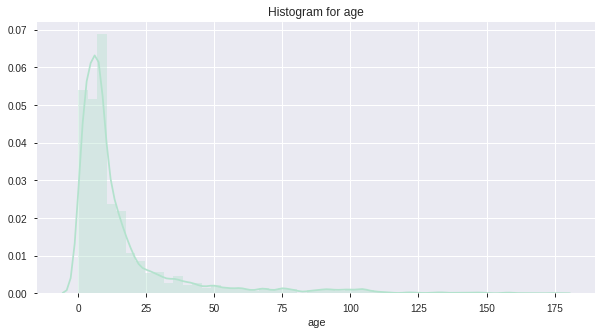

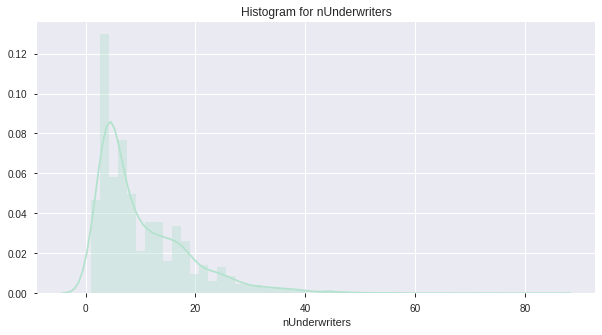

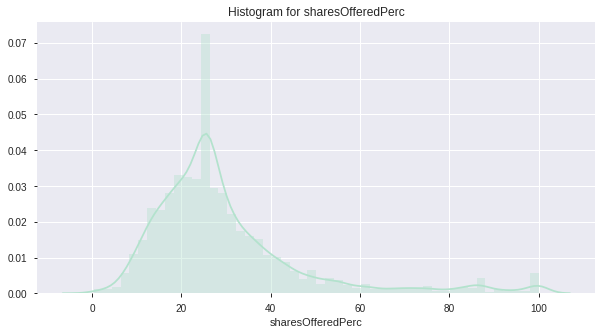

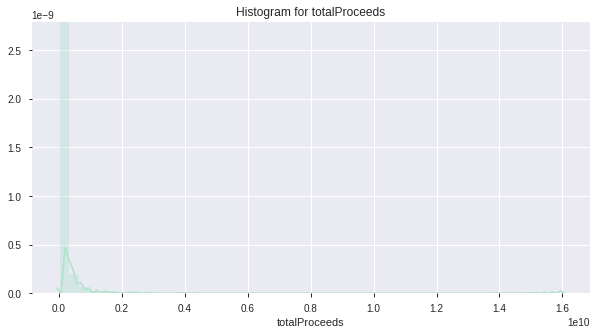

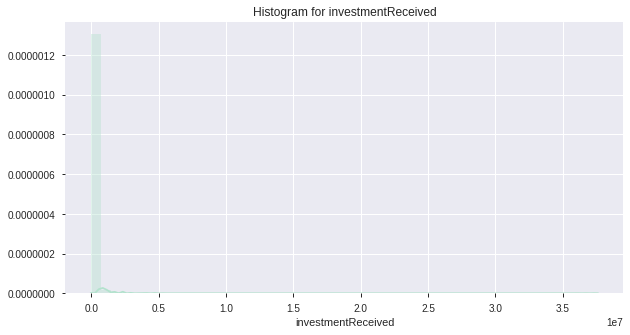

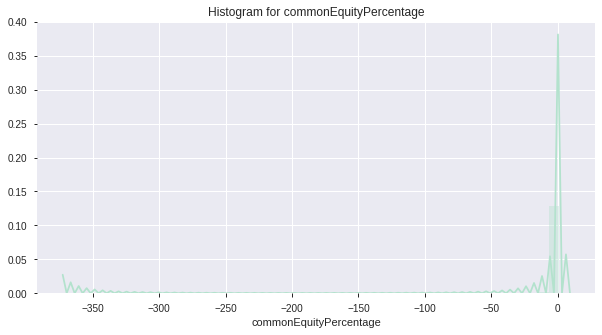

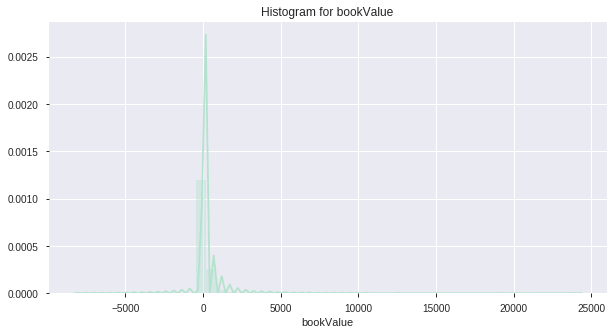

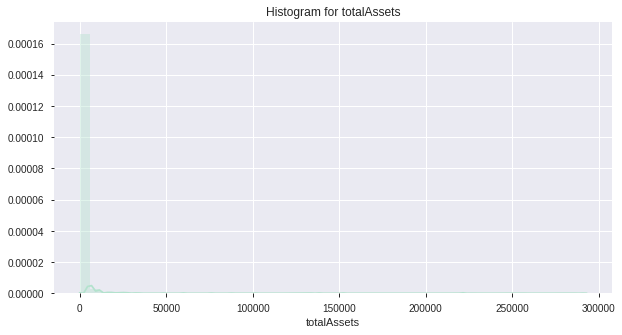

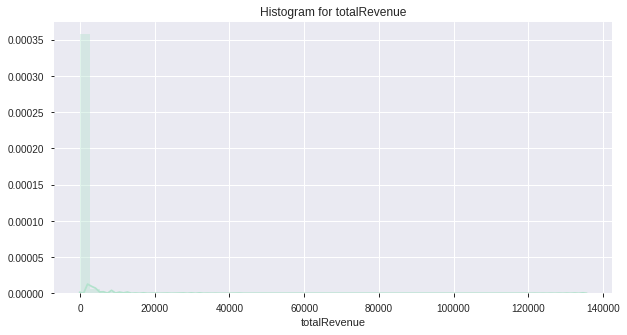

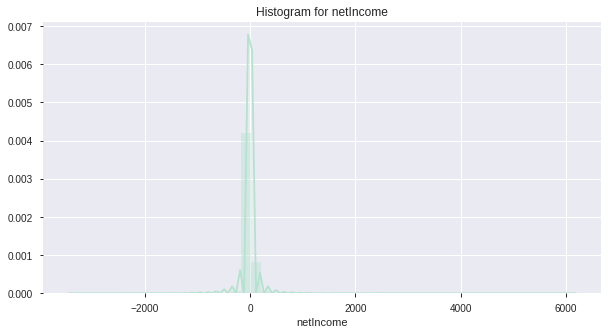

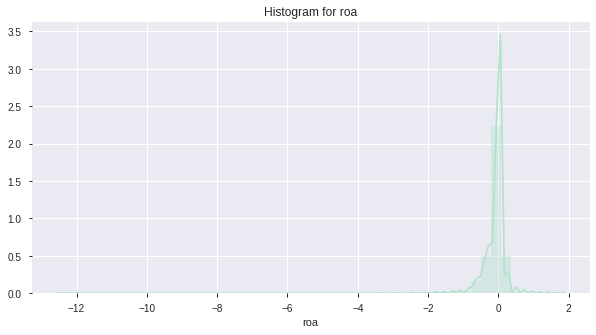

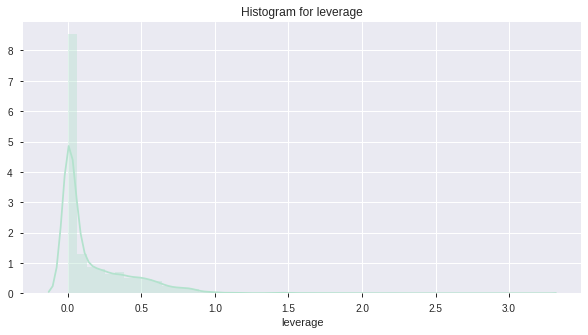

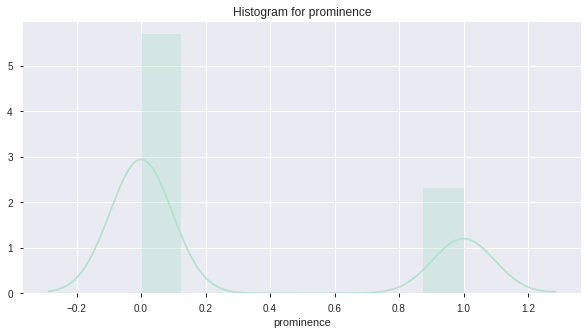

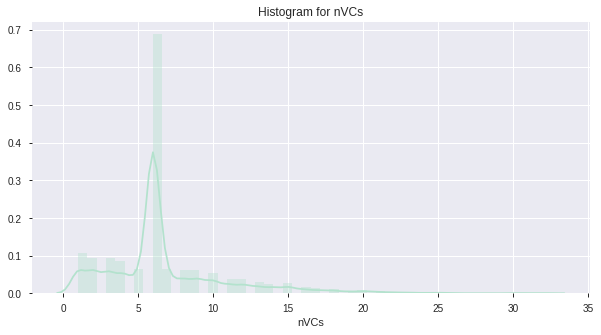

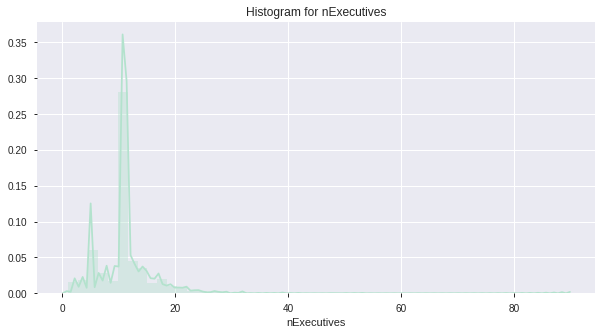

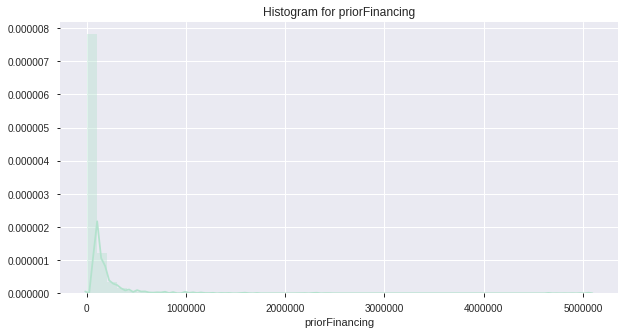

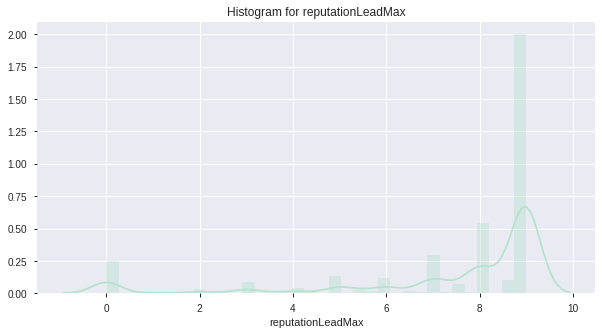

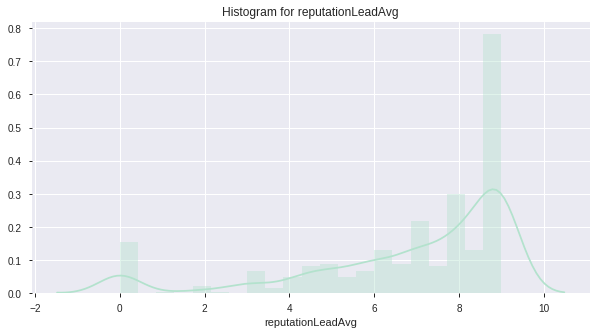

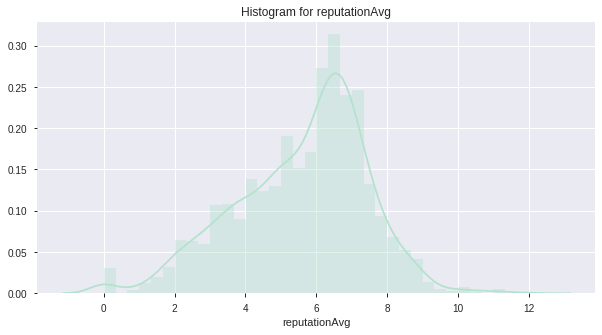

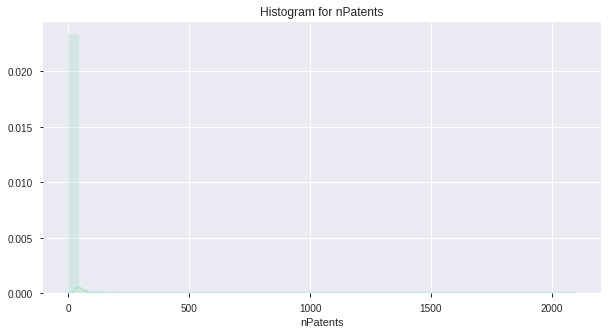

In [63]:
def histogram(feature):
    plt.figure(figsize=(10, 5))
    plt.title("Histogram for {}".format(feature))
    ax = sns.distplot(data_to_learn[feature],color=sns.color_palette("Pastel2")[0])
for feature in cols_to_plot:
    histogram(feature)